In [2]:
from py_experimenter.experimenter import PyExperimenter
#experimenter = PyExperimenter(experiment_configuration_file_path="config/experiments-analysis-classification.cfg")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
from tqdm.notebook import tqdm

In [8]:
%%time
result_table = experimenter.get_table()
result_table = result_table[result_table["status"] == "done"]
print(len(result_table))
result_table

0
CPU times: user 183 ms, sys: 52.7 ms, total: 236 ms
Wall time: 389 ms


,ID,openmlid,seed,target_type,creation_date,status,start_date,name,machine,analysis,end_date,error


In [4]:
import pandas as pd
datasets = list(pd.read_csv("../../../../lcdb/python/lcdb/datasets.csv")["openmlid"].values)

In [5]:
Z = np.zeros((len(datasets), 10))
for i, openmlid in enumerate(datasets):
    m1 = result_table["openmlid"].astype(int) == openmlid
    for j in range(10):
        m2 = result_table["seed"].astype(int) == j
        Z[i,j] = np.count_nonzero(m1 & m2)

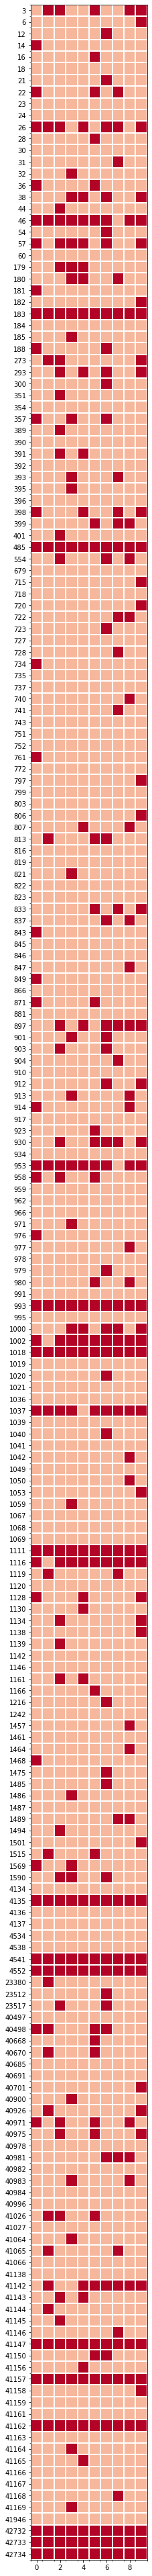

In [6]:
fig, ax = plt.subplots(figsize=(10,70))
ax.imshow(-Z, cmap="coolwarm", vmin = -3, vmax = 0)
ax.set_yticks(range(len(datasets)))
ax.set_yticklabels(datasets)
ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
ax.set_yticks(np.arange(-.5, len(datasets), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.show()

In [3]:
result_table.to_csv("results_analysis.csv", index=False, sep=";")

NameError: name 'result_table' is not defined

In [6]:
for openmlid, df_dataset in tqdm(result_table.groupby("openmlid")):
    rows_dataset = []
    for i, row in df_dataset.iterrows():
        try:
            for entry in json.loads(row["analysis"]):
                del entry[-2] # eliminate the gap, that is computed later anyway
                rows_dataset.append([row["openmlid"], row["seed"]] + entry)
        except KeyboardInterrupt:
            raise
        except:
            print("error, skipping")
            pass
    pd.DataFrame(rows_dataset, columns=["openmlid", "seed", "epsilon", "w_min", "delta", "c", "bootstrap_repeats", "num_trees", "reasoning_time"]).to_csv(f"sensitivity/{openmlid}.csv", index=False)

  0%|          | 0/205 [00:00<?, ?it/s]

error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, skipping
error, s

In [ ]:
df_sensitivity = pd.concat(dfs)

In [3]:
result_table = pd.read_csv("results_analysis.csv", sep=";")

In [4]:
result_table

,ID,openmlid,seed,creation_date,status,start_date,name,machine,analysis,end_date,error
0,1,3,0,"11/23/2022, 22:03:42",done,NaN,2547025.0,n2cn0972,"[[0.001, 1000, 1000, 100000, 20, 13800, 0.0, 2...","11/24/2022, 04:12:28",NaN
1,4,3,3,"11/23/2022, 22:03:42",done,NaN,2546536.0,n2cn1129,"[[0.001, 1000, 1000, 100000, 20, 14000, 0.0, 2...","11/24/2022, 02:09:49",NaN
2,5,3,4,"11/23/2022, 22:03:42",done,NaN,2547014.0,n2cn0880,"[[0.001, 1000, 1000, 100000, 20, 13800, 0.0, 2...","11/24/2022, 03:22:28",NaN
3,7,3,6,"11/23/2022, 22:03:42",done,NaN,2547010.0,n2cn0972,"[[0.001, 1000, 1000, 100000, 20, 13000, 0.0, 2...","11/24/2022, 03:13:16",NaN
4,8,3,7,"11/23/2022, 22:03:42",done,NaN,NaN,n2cn1167,"[[0.001, 1000, 1000, 100000, 20, 13200, 0.0, 2...",NaN,error \n1205 (HY000): Lock wait timeout exceed...
...,...,...,...,...,...,...,...,...,...,...,...
1768,2056,41946,5,"11/23/2022, 22:03:42",done,NaN,2547025.0,n2cn0972,"[[0.001, 1000, 1000, 100000, 20, 10400, 0.0, 1...","11/24/2022, 05:41:07",NaN
1769,2057,41946,6,"11/23/2022, 22:03:42",done,NaN,2547025.0,n2cn0972,"[[0.001, 1000, 1000, 100000, 20, 11800, 0.0, 2...","11/24/2022, 04:10:53",NaN
1770,2058,41946,7,"11/23/2022, 22:03:42",done,NaN,2547028.0,n2cn1167,"[[0.001, 1000, 1000, 100000, 20, 11900, 0.0, 1...","11/24/2022, 04:53:06",NaN
1771,2059,41946,8,"11/23/2022, 22:03:42",done,NaN,2547010.0,n2cn0972,"[[0.001, 1000, 1000, 100000, 20, 10100, 0.0, 1...","11/24/2022, 02:41:36",NaN
